<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/DNN_Boston_Regression_Analysis_EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston_Housing - Regression Analysis
보스턴 집값 예측
* 목표 : 1. DNN으로 Regression모델 만들기 2. EalryStopping과 ModelCheckPoint 활용하기
## 0.Import TensorFlow & Keras

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [ ]:
import tensorflow as tf

tf.__version__

'2.4.1'

* GPU 설정 Off : 설정하지 않아도 성능차이 없기 때문

In [ ]:
tf.test.gpu_device_name()

''

* import Keras

In [ ]:
import keras

keras.__version__

'2.4.3'

## 1.Boston_Housing Data_Set Load & Review
### 1)Load Boston_Housing Data_Set

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


### 2)Data_Set Information

In [ ]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


## 2.Data Preprocessing
### 1)Standardization
* train_data & test_data

In [ ]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

### 2)Train & Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

## 3.Boston_Housing Keras Modeling
### 1)Model Define

In [ ]:
from keras import models
from keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))  #마지막 layer엔 activation을 넣지 않는다(수치예측이기 때문)/예측 모델은 값이 1개 도출되어야 한다

In [ ]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### 2)Model Compile

In [ ]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae']) #mae? 실제 집 값과 비슷하게 나타내기 위해서 

### 3)Model Fit
* 약 4분

In [ ]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 389.6103 - mae: 16.2398 - val_loss: 50.8083 - val_mae: 4.2276
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 28.2465 - mae: 3.9232 - val_loss: 33.0879 - val_mae: 3.4674
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 20.2890 - mae: 2.9669 - val_loss: 34.2752 - val_mae: 3.3618
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 20.5980 - mae: 3.1102 - val_loss: 25.7432 - val_mae: 2.6271
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 12.6053 - mae: 2.5491 - val_loss: 23.7852 - val_mae: 2.7244
Epoch 6/500
323/323 [==============================] - 0s 850us/step - loss: 10.2853 - mae: 2.4393 - val_loss: 19.9302 - val_mae: 2.6648
Epoch 7/500
323/323 [==============================] - 0s 1ms/step - loss: 9.5300 - mae: 2.2493 - val_loss: 19.5965 - val_mae: 2.5013
Epoch 8/500
323/323 [==============================]

### 4)Model Evaluate

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MSE is : ', test_mse_score) #loss값으로 나타남(loss)
print('MAE is : ', test_mae_score) #성능측정지표로 나타남(metric)

4/4 [==============================] - 0s 2ms/step - loss: 15.9130 - mae: 2.6913
MSE is :  15.91301441192627
MAE is :  2.691267728805542


### 5)Visualization
* 전체 시각화

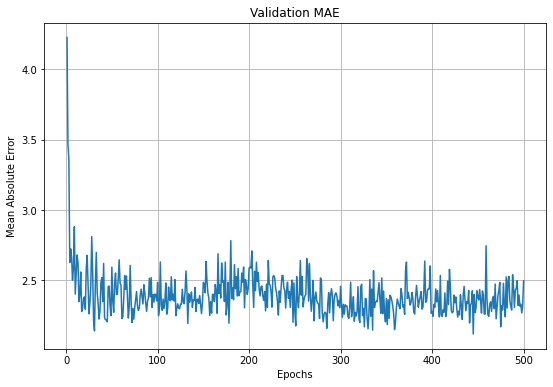

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

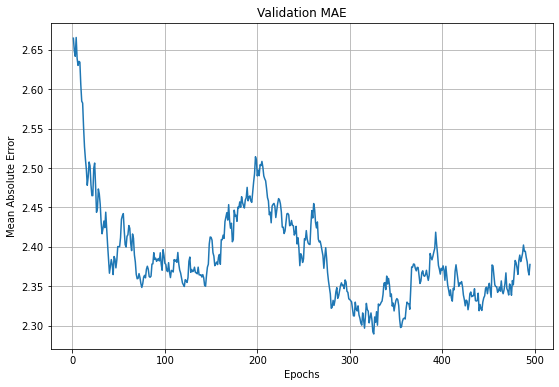

In [ ]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9,6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

### 6)Keras Session Clear

In [ ]:
from keras import backend as K

K.clear_session()

## 4.Ealry Stopping
### 1)Model Define & Compile

In [ ]:
from keras import models
from keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13, )))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

### 2)EarlyStopping()
* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

### 3)ModelCheckpoint()
* 'best_boston.h5' : 최적 모델이 저장될 경로
* save_best_only : 최적 모델만 저장할지 결정

In [ ]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

### 4)Model Fit with callbacks
* callbacks : Earlystopping()과 ModelCheckpoint()객체 지정

In [ ]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 316.8324 - mae: 15.2400 - val_loss: 38.6746 - val_mae: 3.6351

Epoch 00001: val_mae improved from inf to 3.63514, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 27.3567 - mae: 3.5433 - val_loss: 27.3766 - val_mae: 2.9165

Epoch 00002: val_mae improved from 3.63514 to 2.91651, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 18.1506 - mae: 2.9551 - val_loss: 27.0565 - val_mae: 2.7439

Epoch 00003: val_mae improved from 2.91651 to 2.74392, saving model to best_boston.h5
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 14.7009 - mae: 2.5998 - val_loss: 24.4424 - val_mae: 2.8750

Epoch 00004: val_mae did not improve from 2.74392
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 10.9307 - mae: 2.2462 - val_loss: 20.8274 - val_mae: 2.7145

Epoch 00005: v

### 5)Best Model

In [ ]:
!ls -l

total 76
-rw-r--r-- 1 root root 70296 Mar 19 06:26 best_boston.h5
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


### 6)Model Evaluate

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MSE is : ', test_mse_score) 
print('MAE is : ', test_mae_score) #오차가 줄었다

4/4 [==============================] - 0s 3ms/step - loss: 16.1465 - mae: 2.4058
MSE is :  16.146488189697266
MAE is :  2.405752658843994


본 내용은 2021/03/19(금)에 학습한 내용입니다.